# 1. Introduction

***
Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. This project will be a showcasing of linear regression.

The Boston Housing data set contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.
***

# 2. Sourcing and Loading

**2a. Import relevant libraries**

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

**2a. Dataset description**

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**2b. Preliminary data analysis**

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3. Exploratory Data Analysis

**3a. `CRIM` vs. `PRICE`**

Text(0.5, 1.0, 'Relationship between CRIM and Price')

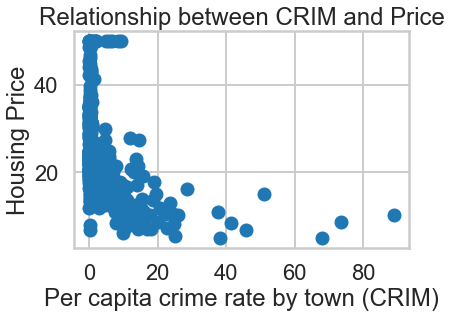

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

From this scatterplot, we can see that there is a negative, non-linear relationship between the per capita crime rate of the town and the housing price. Outliers are located in this cluster as the per capita crime rate increases.

The data for `CRIM` seems to be bimodal and is not normally distributed.

**3b. `RM` vs. `PRICE`**

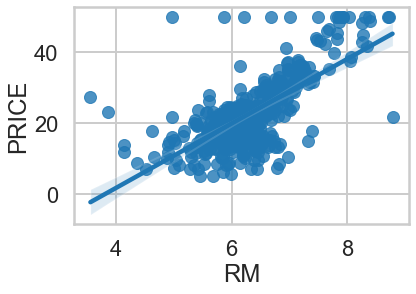

In [13]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

There seems to be a more linear, positive relationship between housing price and the average number of rooms in a dwelling.

**3c. `PTRATIO` vs. `PRICE`**

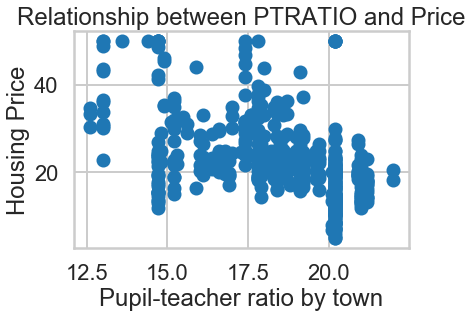

In [14]:
_ = plt.scatter(bos.PTRATIO, bos.PRICE)
_ = plt.xlabel("Pupil-teacher ratio by town")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between PTRATIO and Price")

The cluster in this scatterplot is a lot less decipherable, and most little to no correlation.

**3d. `B` vs. `PRICE`**

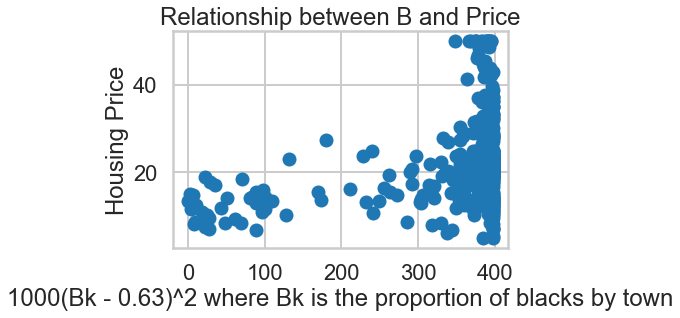

In [15]:
_ = plt.scatter(bos.B, bos.PRICE)
_ = plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between B and Price")

In this scatterplot, we can see a non-linear positive relationship between housing prices and the proportion of black people in the town. 

**3e. Closer examination of `CRIM`**

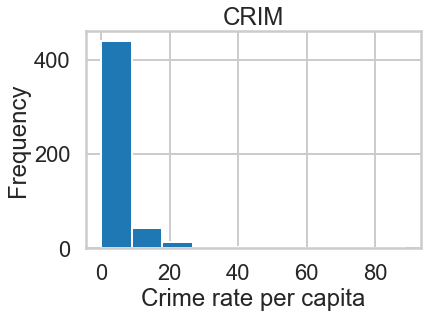

In [16]:
_ = plt.hist(bos.CRIM)
_ = plt.title("CRIM")
_ = plt.xlabel("Crime rate per capita")
_ = plt.ylabel("Frequency")
_ = plt.show() 

Without taking the log, the distribution is too skewed, making it difficult to interpret patterns in the data.

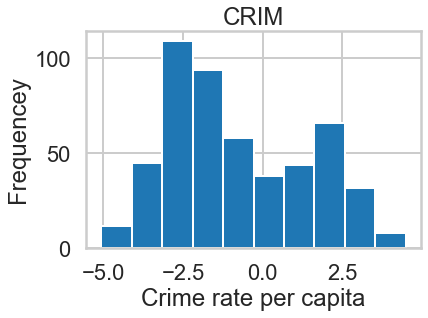

In [17]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

After taking the log, the data is now more normalized. I now notice that the variable is bimodal

**3f. Closer examination of `RM`**

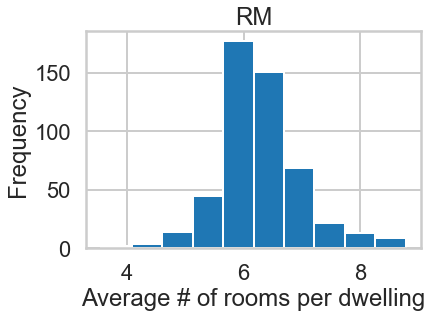

In [18]:
_ = plt.hist(bos.RM)
_ = plt.title("RM")
_ = plt.xlabel("Average # of rooms per dwelling")
_ = plt.ylabel("Frequency")
plt.show()

**3g. Closer examination of `PTRATIO`**

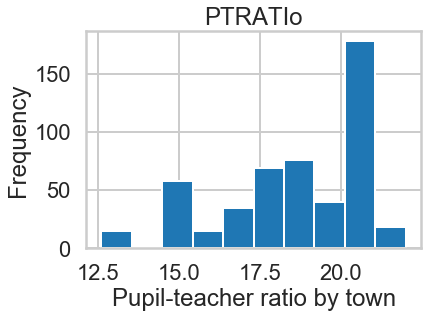

In [19]:
_ = plt.hist(bos.PTRATIO)
_ = plt.title("PTRATIo")
_ = plt.xlabel("Pupil-teacher ratio by town")
_ = plt.ylabel("Frequency")
plt.show()

**3h. Closer examination of `B`**

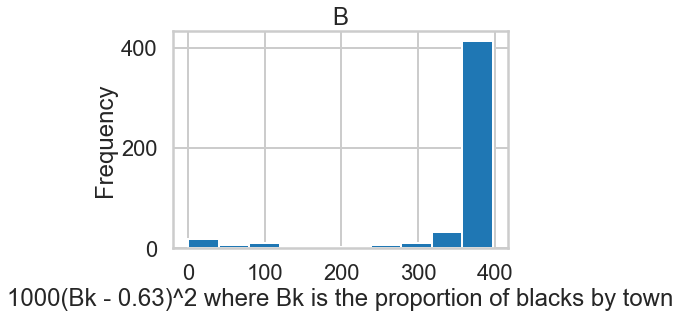

In [20]:
_ = plt.hist(bos.B)
_ = plt.title("B")
_ = plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
_ = plt.ylabel("Frequency")
plt.show()

# 4. Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. Here's a quick example of what I could do with it. The version of least-squares I will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

I will use two ways of fitting a linear regression.

**4a. `statsmodels` Linear Regression**

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           2.49e-74
Time:                        20:56:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

***Interpreting coefficients***

There is a ton of information in this output. But I'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statistical significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

I will now check to see how my model actually fits my data. 

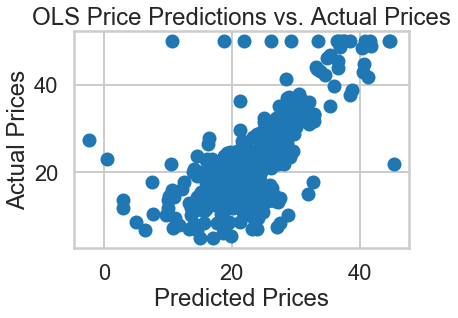

In [23]:
_ = plt.scatter(m.fittedvalues, bos.PRICE)
_ = plt.title('OLS Price Predictions vs. Actual Prices')
_ = plt.xlabel('Predicted Prices')
_ = plt.ylabel('Actual Prices')

We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

***Predicted prices**

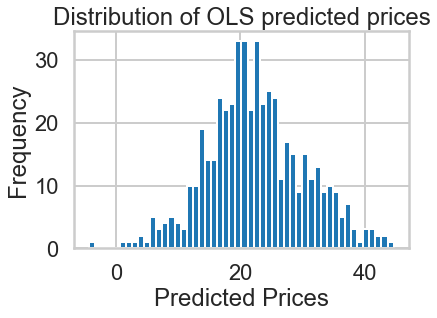

In [24]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

lm = LinearRegression()
lm.fit(X, bos.PRICE)

_ = plt.hist(lm.predict(X), bins=50)
_ = plt.title('Distribution of OLS predicted prices')
_ = plt.xlabel('Predicted Prices')
_ = plt.ylabel('Frequency')

The predicted prices based on our `sklearn` linear regression model came out to be normally distributed around a value of 20.

The sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.
The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. 

In [25]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


The explained sum-of-squares measures the variance explained by the regression model.

In [26]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


In [27]:
model = ols('PRICE ~ PTRATIO',bos).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.61e-34
Time:                        20:56:19   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

At a `PTRATIO` of 0, PRICE is predicted to be ~-2.16. With each increase of 1 in `PTRATIO`, `PRICE` is predicted to increase by
62.34. The R squared value is ~0.26, signaling that the correlation is weak. The F-statistic is 175.1, which is large enough to say we have enough evidence to reject the null hypothesis; that the regression coefficient for this model should be 0. Both the t-statistic and F-statistic have very low p-values.

In [29]:
X = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos[['PRICE']]
model = sm.OLS(y, X).fit()
model.fvalue, model.f_pvalue

(2727.467428440544, 1.19990738815183e-310)

There is sufficient evidence to reject the null hypothesis that this model has no predictability power

In [30]:
model.rsquared

0.9420867354814327

A large proportion of the variance in the PRICE variable can be explained by the independent variables in this regression
model

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              2727.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):                   1.20e-310
Time:                        20:56:20   Log-Likelihood:                         -1612.3
No. Observations:                 506   AIC:                                      3231.
Df Residuals:                     503   BIC:                                      3243.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.2041      0.032     -6.378      0.000      -0.267      -0.141
RM             7.1055      0.230     30.874      0.000       6.653       7.558
PTRATIO       -1.1580      0.080    -14.427      0.000      -1.316      -1.000
==============================================================================
Omnibus:                      233.715   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1959.552
Skew:                           1.816   Prob(JB):                         0.00
Kurtosis:                      11.930   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables in this model are significant in predicting housing price. The most significant variable in this model is
`RM`. If all other variables were held constant, one unit increase in `RM` would increase `PRICE` by 7.1055.

**4b. `sklearn` Linear Regression**

`sklearn` is another great Python library with more powerful features. I will apply a linear model using this module to the data.

In [32]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Although there is an option to add 'fit_intercept=False' in our model, I would not recommend that route for this data. That should only be done if we are 100% sure the regression line will go through the origin, which it almost never does. In order for the linear model to be accurate a normal distribution of residuals is not enough, as they they must also be homoscedastic. Fortunately, the dependent variable, (`PRICE` in this situation) does not need to be normally distributed, just the residuals. 

In [34]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [35]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [36]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [37]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

In [38]:
X = bos[['CRIM', 'RM', 'PTRATIO', 'B']]
y = bos[['PRICE']]
model = sm.OLS(y, X).fit()
model.fvalue, model.aic

(2153.6664291439392, 3207.120508189977)

Since this 2nd model has a lower AIC, this model is actually better.

# 5. Scatterplots of Linear Regression Model

**5b. Residuals plot**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


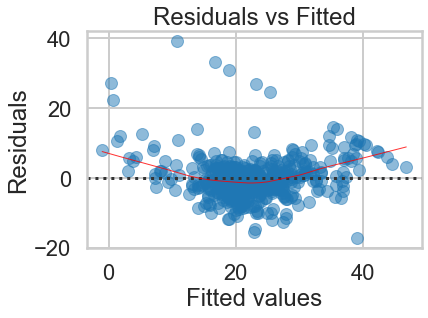

In [39]:
X = bos[['CRIM', 'RM', 'PTRATIO']]
X = sm.add_constant(X)
y = bos[['PRICE']]
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

dataframe = pd.concat([X, y], axis=1)
model_fitted_y = model_fit.fittedvalues
model_residuals = model_fit.resid
fig = sns.residplot(model_fitted_y, dataframe.PRICE, data=dataframe,
                          lowess=True, scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
fig.set_title('Residuals vs Fitted')
fig.set_xlabel('Fitted values')
fig.set_ylabel('Residuals');

Since there is a bow-shaped line, this is an indicator that we are failing to capture some of the non-linear features of the 
model. Perhaps the variance in the data might be better captured using the square (or some other non-linear transformation) of 
one or more of the features.

**5b. QQ Plot**

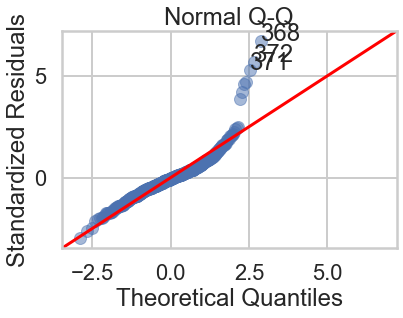

In [40]:
from statsmodels.graphics.gofplots import ProbPlot
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_residuals)
fig2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
fig2.axes[0].set_title('Normal Q-Q')
fig2.axes[0].set_xlabel('Theoretical Quantiles')
fig2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    fig2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

The advantage of the residuals plot is that it can detect homeoscedastity. The advantages of the QQ plot are that the sample
sizes do not have to be equal, and many distributional aspects can be simultaneously tested. shifts in location, shifts in 
scale, changes in symmetry, and the presence of outliers can all be detected from this plot. 

That said, the errors are not normally distributed, and we are more likely to see extreme values than to be expected if the data was truly normally distributed.

**5c. Outlier check**

In [41]:
box = sns.boxplot(y)
box.set_title('PRICE boxplot')
box.set_xlabel('PRICE')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

There seems to be one outlier towards the beginning of the column and a large amount of outliers on the right side of the 
boxplot. A leverage plot should be able to tell us if these outliers exert too much influence on our data.

In [ ]:
model_leverage = model_fit.get_influence().hat_matrix_diag
model_cooks = model_fit.get_influence().cooks_distance[0]
fig4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
fig4.axes[0].set_xlim(0, max(model_leverage)+0.01)
fig4.axes[0].set_ylim(-3, 5)
fig4.axes[0].set_title('Residuals vs Leverage')
fig4.axes[0].set_xlabel('Leverage')
fig4.axes[0].set_ylabel('Standardized Residuals');
# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    fig4.axes[0].annotate(i,
                                xy=(model_leverage[i],
                                model_norm_residuals[i]));

In [ ]:
X = bos[['CRIM', 'RM', 'PTRATIO']]
X = sm.add_constant(X)
y = bos[['PRICE']]
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()
pred = model_fit.fittedvalues
_ = plt.scatter(y, pred)
_ = plt.title('Predicted price values vs. actual values')
_ = plt.xlabel('Actual price values')
_ = plt.ylabel('Predicted price values')
_ = plt.plot(plt.xlim(), plt.ylim(), color='red')

However, when the outliers are removed, the regression model fits much better. Still, we should be cautious when it comes to removing outliers without good reason.

In [ ]:
# The regression model fits much better without the outliers
bos[pd.isnull(bos)]=0
no_outs = bos[(np.abs(stats.zscore(bos['PRICE']))<1.5)]
no_outs.shape

X = no_outs[['CRIM', 'RM', 'PTRATIO']]
X = sm.add_constant(X)
y = no_outs[['PRICE']]
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()
pred = model_fit.fittedvalues
_ = plt.scatter(y, pred)
_ = plt.title('Predicted price values vs. actual values')
_ = plt.xlabel('Actual price values')
_ = plt.ylabel('Predicted price values')
_ = plt.plot(plt.xlim(), plt.ylim(), color='red')

The residuals plot also looks much better without the outliers.

# 6. Conclusion

We have evidence that a model based on certain features has some predictability power on the pricing of Boston dwellings. Some features are more influential, like the number of rooms, than other.